In [42]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import os

plt.rc("font", family = "gulim")
plt.rc("axes", unicode_minus = False)

fpath = "./01_Data_handling/dataset"

In [43]:
from sklearn.linear_model import LinearRegression

In [3]:
mtcars = pd.read_excel("C:/Users/user/Desktop/SeSAC_code/김남범 교수님/01_Data_handling/ml_dataset/dataset/mtcars.xlsx")
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
# 대문자로 쓰면 매트릭스 소문자는 벡터
train_X = mtcars.loc[:, "cyl":"qsec"]
train_y = mtcars.loc[:, "mpg"] # 시리즈인 y는 벡터이니 소문자로

print(train_X.head())
print(train_y.head())
print(type(train_X.head()))
print(type(train_y.head()))

   cyl   disp   hp  drat     wt   qsec
0    6  160.0  110  3.90  2.620  16.46
1    6  160.0  110  3.90  2.875  17.02
2    4  108.0   93  3.85  2.320  18.61
3    6  258.0  110  3.08  3.215  19.44
4    8  360.0  175  3.15  3.440  17.02
0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [5]:
lr = LinearRegression()
lr.fit(train_X, train_y)

LinearRegression()

In [6]:
print("Train R-square = ", round(lr.score(train_X, train_y), 3))

Train R-square =  0.855


In [7]:
# lr.coef_
# train_X.columns
coeff_df = pd.DataFrame(lr.coef_, index = train_X.columns, columns = ["coefficient"])
print(coeff_df)

      coefficient
cyl     -0.818560
disp     0.013205
hp      -0.017930
drat     1.320406
wt      -4.190832
qsec     0.401461


## KNN (k-nearest neigcors classifier)k-최근접 이웃 알고리즘

## 도미자료와 방어자료 불러오기

In [8]:
# 도미자료
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 방어자료
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# list 길이
print(type(bream_length))
print("length of bream = ", len(bream_length), "\nlength of smelt = ",len(smelt_length))

# 용약 통계량
print("mean of 도미길이 = ", round(np.mean(bream_length), 2))
print("mean of 방어길이 = ", round(np.mean(smelt_length), 2))

print("mean of 도미무게 = ", round(np.mean(bream_weight), 2))
print("mean of 방어무게 = ", round(np.mean(smelt_weight), 2))

<class 'list'>
length of bream =  35 
length of smelt =  14
mean of 도미길이 =  33.11
mean of 방어길이 =  11.92
mean of 도미무게 =  617.83
mean of 방어무게 =  11.18


In [9]:
# string interpolation
print("도미무게 = {:.4f}, 길이 = {:.4f}".format(np.mean(bream_weight), np.mean(smelt_weight)))
print("방어무게 = {:.4f}, 길이 = {:.4f}".format(np.mean(bream_weight), np.mean(smelt_weight)))

도미무게 = 617.8286, 길이 = 11.1786
방어무게 = 617.8286, 길이 = 11.1786


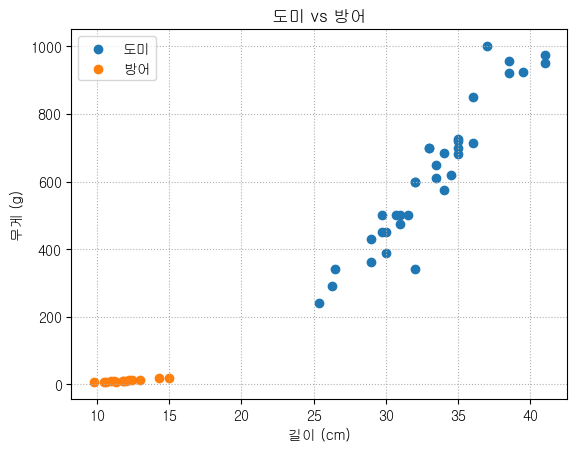

In [10]:
## Scatter plot
plt.scatter(bream_length, bream_weight, label = "도미")
plt.scatter(smelt_length, smelt_weight, label = "방어")
plt.title("도미 vs 방어")
plt.xlabel("길이 (cm)")
plt.ylabel("무게 (g)")
plt.grid(linestyle = ":")
plt.legend()
plt.show()

In [11]:
## list
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

print(np.shape(length))
print(np.shape(weight))

## x_2d
fish_data = np.column_stack([length, weight])
print(fish_data)

(49,)
(49,)
[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [12]:
len(bream_length)

35

In [13]:
##
fish_target = np.append(np.ones(len(bream_length)), np.zeros(len(smelt_length)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
## knn class
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LinearRegression

In [15]:
knn = KNeighborsClassifier(n_neighbors=5, # 이웃의 수를 5로 설정. K 값 (보통 홀수를 사용하여 다수결로 분류)
                           weights = "uniform", # 모든 이웃에 동일한 가중치 부여. 'distance'로 설정하면 가까운 이웃일수록 더 큰 가중치 부여
                           metric = "minkowski", # 거리 측정 방법으로 Minkowski 거리 사용 (일반적인 거리 측정 방법)
                           p = 2) # Minkowski 거리의 p 값. p=2는 유클리드 거리와 동일

knn.fit(fish_data, fish_target)
print("Train ACC? = ", knn.score(fish_data, fish_target)) # 트레이닝 셋

Train ACC? =  1.0


In [16]:
## Attribute
print("classes = ", knn.classes_)
print("metrics = ", knn.effective_metric_)
print("samples = ", knn.n_samples_fit_)

classes =  [0. 1.]
metrics =  euclidean
samples =  49


In [17]:
##
np.column_stack([fish_data, fish_target])

array([[  25.4,  242. ,    1. ],
       [  26.3,  290. ,    1. ],
       [  26.5,  340. ,    1. ],
       [  29. ,  363. ,    1. ],
       [  29. ,  430. ,    1. ],
       [  29.7,  450. ,    1. ],
       [  29.7,  500. ,    1. ],
       [  30. ,  390. ,    1. ],
       [  30. ,  450. ,    1. ],
       [  30.7,  500. ,    1. ],
       [  31. ,  475. ,    1. ],
       [  31. ,  500. ,    1. ],
       [  31.5,  500. ,    1. ],
       [  32. ,  340. ,    1. ],
       [  32. ,  600. ,    1. ],
       [  32. ,  600. ,    1. ],
       [  33. ,  700. ,    1. ],
       [  33. ,  700. ,    1. ],
       [  33.5,  610. ,    1. ],
       [  33.5,  650. ,    1. ],
       [  34. ,  575. ,    1. ],
       [  34. ,  685. ,    1. ],
       [  34.5,  620. ,    1. ],
       [  35. ,  680. ,    1. ],
       [  35. ,  700. ,    1. ],
       [  35. ,  725. ,    1. ],
       [  35. ,  720. ,    1. ],
       [  36. ,  714. ,    1. ],
       [  36. ,  850. ,    1. ],
       [  37. , 1000. ,    1. ],
       [  

In [18]:
idx = np.arange(49)
np.random.shuffle(idx)
print(idx)

[14 29 15 26  9 45  8 42 43 32  2 23 19  6 24  0 36 25 48 46 17 44 40 47
 21 35  1  4 16 33 28  3 27 12 41 38 20 10 22 18 11 39 37 13  5  7 31 30
 34]


In [19]:
train_X = fish_data[:35]
train_y = fish_target[idx[:35]]

test_X = fish_data[idx[35:]]
test_y = fish_target[idx[35:]]
# print(np.column_stack((train_X, train_y)))
print(np.column_stack((test_X, test_y)))
# 섞기는 그냥 라이브러리 돌려도 무방

# np.column_type([np.column_stack((train_X, train_y)), np.column_stack((test_X, test_y))]) # 길이안맞음

[[ 11.    9.7   0. ]
 [ 34.  575.    1. ]
 [ 31.  475.    1. ]
 [ 34.5 620.    1. ]
 [ 33.5 610.    1. ]
 [ 31.  500.    1. ]
 [ 11.2   9.8   0. ]
 [ 10.6   7.    0. ]
 [ 32.  340.    1. ]
 [ 29.7 450.    1. ]
 [ 30.  390.    1. ]
 [ 38.5 955.    1. ]
 [ 38.5 920.    1. ]
 [ 41.  950.    1. ]]


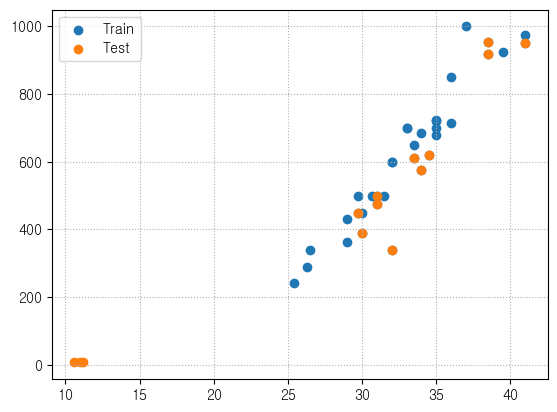

In [20]:
# 공부할때만 쓰는것 좋지않아
plt.scatter(train_X[:, 0], train_X[:, 1], label = "Train")
plt.scatter(test_X[:, 0], test_X[:, 1], label = "Test")
plt.legend()
plt.grid(linestyle = ":")
plt.show()

In [21]:
knn = KNeighborsClassifier(
    n_neighbors = 5,
    weights="uniform",
    metric="minkowski",
    p = 2
)

In [22]:
knn.fit(train_X, train_y)
print("Test Acc = ", knn.score(test_X, test_y))
print("classes = ", knn.classes_)
print("metrics = ", knn.effective_metric_)
print("samples = ", knn.n_samples_fit_)

Test Acc =  0.7142857142857143
classes =  [0. 1.]
metrics =  euclidean
samples =  35


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_X, test_X, train_y ,test_y = train_test_split(
    fish_data, fish_target, stratify=fish_target, # random_state= 911 고정된 동일한 결과를 얻고 싶을때
)

print(train_X)

[[ 25.4 242. ]
 [ 38.5 955. ]
 [ 15.   19.9]
 [ 31.  500. ]
 [  9.8   6.7]
 [ 31.5 500. ]
 [ 29.7 450. ]
 [ 30.  390. ]
 [ 11.2   9.8]
 [ 32.  340. ]
 [ 33.5 650. ]
 [ 39.5 925. ]
 [ 36.  714. ]
 [ 34.5 620. ]
 [ 13.   12.2]
 [ 31.  475. ]
 [ 11.8   9.9]
 [ 33.  700. ]
 [ 34.  575. ]
 [ 33.  700. ]
 [ 10.6   7. ]
 [ 35.  725. ]
 [ 10.5   7.5]
 [ 33.5 610. ]
 [ 36.  850. ]
 [ 11.8  10. ]
 [ 12.2  12.2]
 [ 26.5 340. ]
 [ 32.  600. ]
 [ 14.3  19.7]
 [ 29.7 500. ]
 [ 35.  680. ]
 [ 29.  430. ]
 [ 35.  700. ]
 [ 38.5 920. ]
 [ 41.  950. ]]


In [25]:
knn = KNeighborsClassifier()
knn.fit(train_X, train_y)
knn.score(test_X, test_y)

1.0

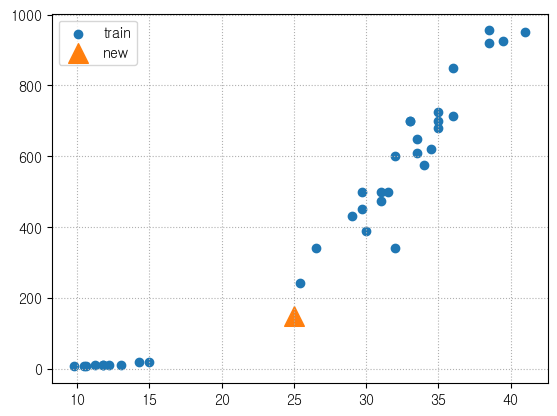

In [26]:
#
plt.scatter(train_X[:, 0], train_X[:, 1], label = "train")
plt.scatter(25, 150, marker="^", s=200, label = "new")
plt.legend()
plt.grid(linestyle = ":")
plt.show()

In [27]:
knn.predict([[25,150]]) # input 넣을때 2d로 들어가서 [[]]로 넣어야 하는것

array([0.])

In [28]:
knn.kneighbors([[25,150]])

(array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
         138.39320793]]),
 array([[ 0,  2, 29, 14, 26]]))

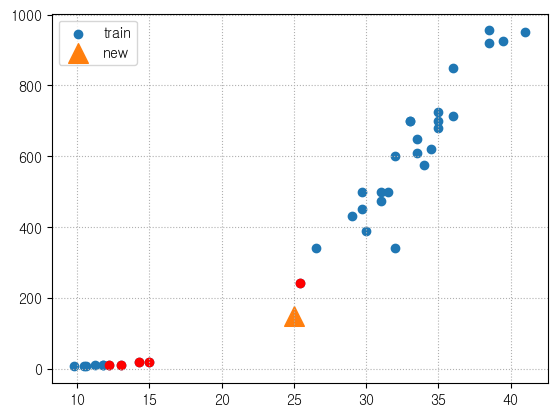

In [29]:
distance, index = knn.kneighbors([[25, 150]])

plt.scatter(train_X[:, 0], train_X[:, 1], label = "train")
plt.scatter(25, 150, marker="^", s = 200, label = "new")
plt.scatter(train_X[index, 0], train_X[index, 1], c="r")
# plt.xlim(0, 1000)
plt.legend()
plt.grid(linestyle = ":")
plt.show()
# 길이보다 무게에 더 가중치가들어가서 잘못된 결과가 나오도록 한 경우
# knn은 그래서 반드시 표준화를 해야만 한다

In [30]:
# 표준화
# trainset의 평균
mean = np.mean(train_X, axis=0)
std = np.std(train_X, axis=0) # 표준편차

train_scaled = (train_X - mean)/std
train_scaled

array([[-0.19252641, -0.65094405],
       [ 1.11200601,  1.59363633],
       [-1.22818574, -1.35013241],
       [ 0.3651363 ,  0.16126035],
       [-1.7460154 , -1.39168706],
       [ 0.41492762,  0.16126035],
       [ 0.23567889,  0.0038564 ],
       [ 0.26555367, -0.18502835],
       [-1.60659973, -1.38192801],
       [ 0.46471893, -0.3424323 ],
       [ 0.61409287,  0.63347221],
       [ 1.21158864,  1.49919396],
       [ 0.86304944,  0.83494927],
       [ 0.7136755 ,  0.53902984],
       [-1.427351  , -1.37437262],
       [ 0.3651363 ,  0.08255837],
       [-1.54685015, -1.3816132 ],
       [ 0.56430156,  0.79087617],
       [ 0.66388418,  0.39736628],
       [ 0.56430156,  0.79087617],
       [-1.6663493 , -1.39074263],
       [ 0.76346681,  0.86957814],
       [-1.67630756, -1.38916859],
       [ 0.61409287,  0.50754905],
       [ 0.86304944,  1.26308803],
       [-1.54685015, -1.3812984 ],
       [-1.5070171 , -1.37437262],
       [-0.08298552, -0.3424323 ],
       [ 0.46471893,

In [32]:
test_scaled = (test_X - mean) / std

knn.fit(train_scaled, train_y)
print("Test ACC = ", knn.score(test_scaled, test_y))
print("Prediction =  ", knn.predict([new]))

Test ACC =  1.0


ValueError: Found array with dim 3. KNeighborsClassifier expected <= 2.

In [ ]:
distance, index = knn.kneighbors([[test_scaled]])

plt.scatter(train_X[:, 0], train_X[:, 1], label = "train")
plt.scatter(25, 150, marker="^", s = 200, label = "test_scaled")
plt.scatter(train_X[index, 0], train_X[index, 1], c="r")
# plt.xlim(0, 1000)
plt.legend()
plt.grid(linestyle = ":")
plt.show()
# 길이보다 무게에 더 가중치가들

In [125]:
# GridSearch
knn = KNeighborsClassifier()

score_list = []
n_list = []

for n in range(3, 30):
    if not n%2:
        knn.n_neighbors = n
        knn.fit(train_scaled, train_y)
        score = knn.score(test_scaled, test_y)
        score_list.append(score)
        n_list.append(n)

In [ ]:
plt.plot(n_list, score_list)
plt.xlabel("k neighbors")
plt.ylabel("Test ACC")
plt.grid(linestyle = ":")
plt.show()

# KNN을 이용하여 Seaborn iris 자료 분류

In [41]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [45]:
iris = sns.load_dataset("iris")
print(iris.head())
print(iris.shape)
# 꽃받침_길이  꽃받침_너비  꽃잎_길이  꽃잎_너비  종

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
(150, 5)


In [46]:
## Summary statistic
iris.describe() # 숫자형데이터 통계

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
## Visualizarion
sns.pairplot(iris, hue = "species", height = 1)
plt.show()

In [ ]:
X = iris.loc[:, :"petal_width"]
y = iris["species"]

train_X, test_X, train_y, test_y, = train_test_split(X, y, test_size=0.2, stratify=y)

print("train_X shape = ", train_X.shape)
print("test_X shape = ", test_X.shape)

In [ ]:
## Scaling
mean = train_X.mean()
std = train_X.std()
# print(mean)

train_scaled = (train_X - mean)/std
test_scaled = (test_X - mean)/std

print(train_scaled)

In [ ]:
##
knn = KNeighborsClassifier() # k = 5

knn.fit(train_scaled, train_y)
print("train ACC = ", knn.score(train_scaled, train_y)) 
print("test ACC =", knn.score(test_scaled, test_y))


In [ ]:
##
print("classes = ", knn.classes_)
print("feature names = ", knn.feature_names_in_)
print("metric = ", knn.effective_metric_)
print("feature names = ", knn.n_samples_fit_)
print("k = ", knn.n_neighbors)

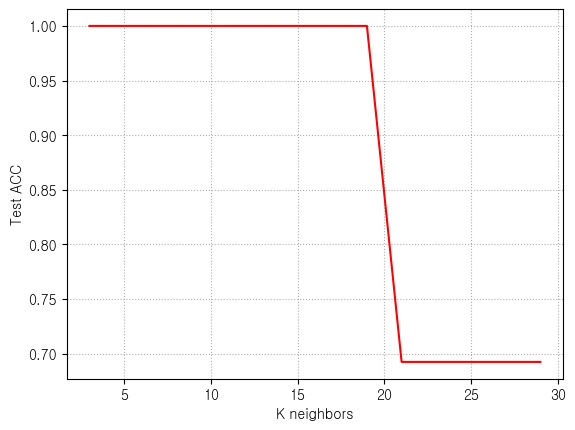

In [33]:
knn = KNeighborsClassifier()

score_list = []
n_list = []

for n in range(3, 30):
    if n% 2 != 0:
        knn.n_neighbors = n
        knn.fit(train_scaled, train_y)
        score = knn.score(test_scaled, test_y)
        score_list.append(score)
        n_list.append(n)

plt.plot(n_list, score_list, c="r")
plt.grid(linestyle = ":")
plt.xlabel("K neighbors")
plt.ylabel("Test ACC")
plt.show()


In [34]:
## RF 와 DT로 머신러닝하고 시각화 해보기
wine = pd.read_csv("https://bit.ly/wine-date")
print(wine.head())
print(wine["class"].value_counts())

wine["class"] = wine["class"].astype("int32")

   alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0
class
1.0    4898
0.0    1599
Name: count, dtype: int64


In [37]:
## Summary statistic
wine_group = wine.groupby("class", observed = True)

wine_group.describe()

for idx, data in wine_group:
    print("class = ", idx)
    print(data.describe())
    print("="*50)

class =  0
           alcohol        sugar           pH   class
count  1599.000000  1599.000000  1599.000000  1599.0
mean     10.422983     2.538806     3.311113     0.0
std       1.065668     1.409928     0.154386     0.0
min       8.400000     0.900000     2.740000     0.0
25%       9.500000     1.900000     3.210000     0.0
50%      10.200000     2.200000     3.310000     0.0
75%      11.100000     2.600000     3.400000     0.0
max      14.900000    15.500000     4.010000     0.0
class =  1
           alcohol        sugar           pH   class
count  4898.000000  4898.000000  4898.000000  4898.0
mean     10.514267     6.391415     3.188267     1.0
std       1.230621     5.072058     0.151001     0.0
min       8.000000     0.600000     2.720000     1.0
25%       9.500000     1.700000     3.090000     1.0
50%      10.400000     5.200000     3.180000     1.0
75%      11.400000     9.900000     3.280000     1.0
max      14.200000    65.800000     3.820000     1.0


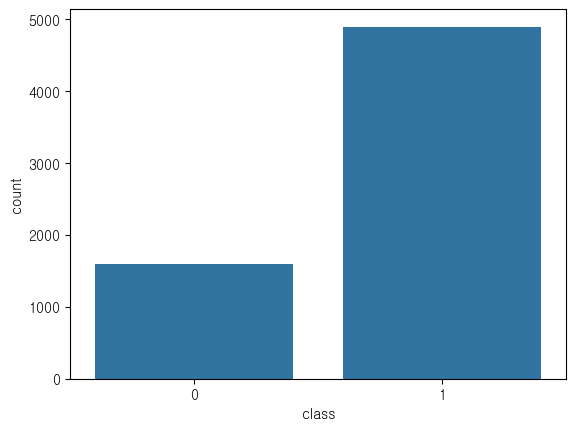

In [39]:
## Visualization
sns.countplot(wine, x = "class")
plt.show()

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt = DecisionTreeClassifier()
dt.fit()
dt.score()



TypeError: DecisionTreeClassifier.fit() missing 2 required positional arguments: 'X' and 'y'